# Overviewing data and splitting it on clusters

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
trips_by_regions = pd.read_csv('regions.csv', sep=';', header=0)

In [3]:
def add_data(df, hours):
    null_time = sorted(df['tpep_pickup_datetime'].values)[0]
    for i in range(hours):
        cur_datetime = null_time + np.timedelta64(i, 'h')
        df_cut_datetime = df[df['tpep_pickup_datetime'] == cur_datetime]
        if df_cut_datetime.shape[0] != 0:
            ret = stats.binned_statistic_2d( df_cut_datetime['pickup_longitude'],  df_cut_datetime['pickup_latitude'],
                              None,  statistic='count',
                              bins=[np.linspace(-74.25559, -73.70001, 51) , np.linspace(40.49612, 40.91553, 51)])
        trips_by_regions[(str(cur_datetime)[:10] + '(hour: {})'.format(i%24))] = ret.statistic.reshape(2500)
        if i%24==0 and i!=0:
            print('day {}'.format(i/24))

## Collect all the data

In [4]:
df1 = pd.read_csv('df1.csv')
df1['tpep_pickup_datetime'] =  pd.to_datetime(df1['tpep_pickup_datetime'], format='%Y%m%d %H:%M:%S.%f')
add_data(df1, 31*24)
del df1
df2 = pd.read_csv('df2.csv')
df2['tpep_pickup_datetime'] =  pd.to_datetime(df2['tpep_pickup_datetime'], format='%Y%m%d %H:%M:%S.%f')
add_data(df2, 29*24)
del df2
df3 = pd.read_csv('df3.csv')
df3['tpep_pickup_datetime'] =  pd.to_datetime(df3['tpep_pickup_datetime'], format='%Y%m%d %H:%M:%S.%f')
add_data(df3, 31*24)
del df3
df4 = pd.read_csv('df4.csv')
df4['tpep_pickup_datetime'] =  pd.to_datetime(df4['tpep_pickup_datetime'], format='%Y%m%d %H:%M:%S.%f')
add_data(df4, 30*24)
del df4

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\scipy\stats\_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


day 1.0
day 2.0
day 3.0
day 4.0
day 5.0
day 6.0
day 7.0
day 8.0
day 9.0
day 10.0
day 11.0
day 12.0
day 13.0
day 14.0
day 15.0
day 16.0
day 17.0
day 18.0
day 19.0
day 20.0
day 21.0
day 22.0
day 23.0
day 24.0
day 25.0
day 26.0
day 27.0
day 28.0
day 29.0
day 30.0
day 1.0
day 2.0
day 3.0
day 4.0
day 5.0
day 6.0
day 7.0
day 8.0
day 9.0
day 10.0
day 11.0
day 12.0
day 13.0
day 14.0
day 15.0
day 16.0
day 17.0
day 18.0
day 19.0
day 20.0
day 21.0
day 22.0
day 23.0
day 24.0
day 25.0
day 26.0
day 27.0
day 28.0
day 1.0
day 2.0
day 3.0
day 4.0
day 5.0
day 6.0
day 7.0
day 8.0
day 9.0
day 10.0
day 11.0
day 12.0
day 13.0
day 14.0
day 15.0
day 16.0
day 17.0
day 18.0
day 19.0
day 20.0
day 21.0
day 22.0
day 23.0
day 24.0
day 25.0
day 26.0
day 27.0
day 28.0
day 29.0
day 30.0
day 1.0
day 2.0
day 3.0
day 4.0
day 5.0
day 6.0
day 7.0
day 8.0
day 9.0
day 10.0
day 11.0
day 12.0
day 13.0
day 14.0
day 15.0
day 16.0
day 17.0
day 18.0
day 19.0
day 20.0
day 21.0
day 22.0
day 23.0
day 24.0
day 25.0
day 26.0
day 27.0
d

In [5]:
# only labled cells from 2nd week
trips_by_regions = trips_by_regions[trips_by_regions['region'].isin([
        1074, 1075, 1076, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
        1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181,
        1182, 1183, 1220, 1221, 1222, 1223, 1224, 1226, 1227, 1228, 1229,
        1230, 1231, 1232, 1233, 1234, 1271, 1272, 1273, 1277, 1278, 1279,
        1280, 1281, 1282, 1283, 1284, 1285, 1286, 1325, 1326, 1330, 1331,
        1332, 1333, 1334, 1335, 1336, 1337, 1338, 1375, 1376, 1377, 1379,
        1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1425, 1430,
        1433, 1434, 1435, 1436, 1437, 1438, 1440, 1441, 1479, 1481, 1482,
        1529, 1531, 1532, 1579, 1629, 1683, 1732, 1733, 1782, 2067, 2068,
        2117, 2118, 2167])]

In [9]:
trips_by_regions_region = trips_by_regions['region']
trips_by_regions_ = np.transpose(trips_by_regions.drop(['west', 'east', 'south', 'north', 'region'], axis=1)) 
trips_by_regions_.columns = ['cell_{}'.format(str(i)) for i in list(range(len(trips_by_regions_.columns)))]
trips_by_regions_ = trips_by_regions_.set_index(pd.date_range('01/01/2016', periods=int(trips_by_regions_.shape[0]), freq='H'))

In [11]:
trips_by_regions_norm = (trips_by_regions_ - np.mean(trips_by_regions_)) / np.std(trips_by_regions_)

In [13]:
from sklearn.cluster import KMeans


amount_of_clusters = 5
kmeans = KMeans(amount_of_clusters, max_iter=1000, random_state=42)

clusters = kmeans.fit_predict(np.transpose(trips_by_regions_norm))

trips_by_regions['cluster'] = clusters.reshape(-1, 1)
trips_by_regions['region'] = trips_by_regions_region

In [15]:
print('cluster 1 regions: {}'.format(trips_by_regions[trips_by_regions['cluster']==0]['region'].values))
print('cluster 2 regions: {}'.format(trips_by_regions[trips_by_regions['cluster']==1]['region'].values))
print('cluster 3 regions: {}'.format(trips_by_regions[trips_by_regions['cluster']==2]['region'].values))
print('cluster 4 regions: {}'.format(trips_by_regions[trips_by_regions['cluster']==3]['region'].values))
print('cluster 5 regions: {}'.format(trips_by_regions[trips_by_regions['cluster']==4]['region'].values))
# trips_by_regions.drop('region', axis=1, inplace=True)

cluster 1 regions: [1075 1125 1126 1127 1128 1131 1179 1180 1229 1230 1231 1232 1233 1281
 1282 1338 1382 1430 1683 1733 2068 2118]
cluster 2 regions: [1074 1124 1220 1226 1271 1325 1330 1381 1433 1440 1479 1481 1482 1529
 1531 1532 1579 1629 1732 1782 2067 2117 2167]
cluster 3 regions: [1172 1173 1174 1175 1182 1224 1277 1387 1388 1389 1435 1436 1437 1438
 1441]
cluster 4 regions: [1129 1130 1171 1176 1177 1178 1221 1222 1223 1227 1228 1272 1273 1278
 1326 1375 1376 1377 1379 1425]
cluster 5 regions: [1076 1181 1183 1234 1279 1280 1283 1284 1285 1286 1331 1332 1333 1334
 1335 1336 1337 1383 1384 1385 1386 1434]


## Cluster visualization

In [16]:
from ipyleaflet import Map, basemaps, Rectangle, basemap_to_tiles, Marker
color_dict = {0: 'red', 1: 'blue', 2: 'white', 3: 'yellow', 4: 'purple'}
rectangles = []
for cell in trips_by_regions.drop('region',axis=1).values:
    SW = (cell[2], cell[0])
    NE = (cell[3], cell[1])
    rectangles.append(Rectangle(bounds=(SW, NE), 
                                color='#BBBBBB', opacity = 0.4, weight=1, 
                                fill_color=color_dict[cell[-1]], fill_opacity=0.5))

In [17]:
m = Map(center=(40.689247, -74.044502), zoom=10)
dark_matter_layer = basemap_to_tiles(basemaps.CartoDB.DarkMatter)
m.add_layer(dark_matter_layer)
for cluster_num in list(color_dict.keys()):
    m.add_layer(Marker(location=(np.mean((trips_by_regions[trips_by_regions['cluster']==cluster_num]['north'] +
                                        trips_by_regions[trips_by_regions['cluster']==cluster_num]['south']) / 2),
                                 (np.mean((trips_by_regions[trips_by_regions['cluster']==cluster_num]['east'] +
                                         trips_by_regions[trips_by_regions['cluster']==cluster_num]['west']) / 2))),
                       title=color_dict[cluster_num], color=color_dict[cluster_num], draggable=False))
for rect in rectangles:
    m.add_layer(rect)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [18]:
# save map widget
from ipywidgets.embed import embed_minimal_html
embed_minimal_html('map_with_clusters.html', views=m, title='Widgets export')

In [19]:
# save progress
trips_by_regions.to_csv('data_with_clusters.csv', index=True)

In [31]:
# split clustered data on separated dataframes
data_cluster_0 = trips_by_regions[trips_by_regions['cluster'] == 0].drop(
    [ 'west', 'east', 'north', 'south', 'cluster', 'region'], axis=1)
data_cluster_1 = trips_by_regions[trips_by_regions['cluster'] == 1].drop(
    ['west', 'east', 'north', 'south', 'cluster', 'region'], axis=1)
data_cluster_2 = trips_by_regions[trips_by_regions['cluster'] == 2].drop(
    [ 'west', 'east', 'north', 'south', 'cluster', 'region'], axis=1)
data_cluster_3 = trips_by_regions[trips_by_regions['cluster'] == 3].drop(
    [ 'west', 'east', 'north', 'south', 'cluster', 'region'], axis=1)
data_cluster_4 = trips_by_regions[trips_by_regions['cluster'] == 4].drop(
    ['west', 'east', 'north', 'south', 'cluster', 'region'], axis=1)

In [30]:
def normalize_data(data_cluster):
    data_cluster = np.transpose(data_cluster)
    data_cluster.columns = [i+1 for i in list(data_cluster.columns)]
    data_cluster = data_cluster.set_index(pd.date_range('01/01/2016', periods=int(data_cluster.shape[0]), freq='H'))
    return data_cluster

In [43]:
pd.__version__

'0.19.2'

## Separating clusters' data on frames and normilizing it

In [32]:
data_cluster_0 = normalize_data(data_cluster_0)
data_cluster_1 = normalize_data(data_cluster_1)
data_cluster_2 = normalize_data(data_cluster_2)
data_cluster_3 = normalize_data(data_cluster_3)
data_cluster_4 = normalize_data(data_cluster_4)

## Let's look at graph of time series of different clusters in scale

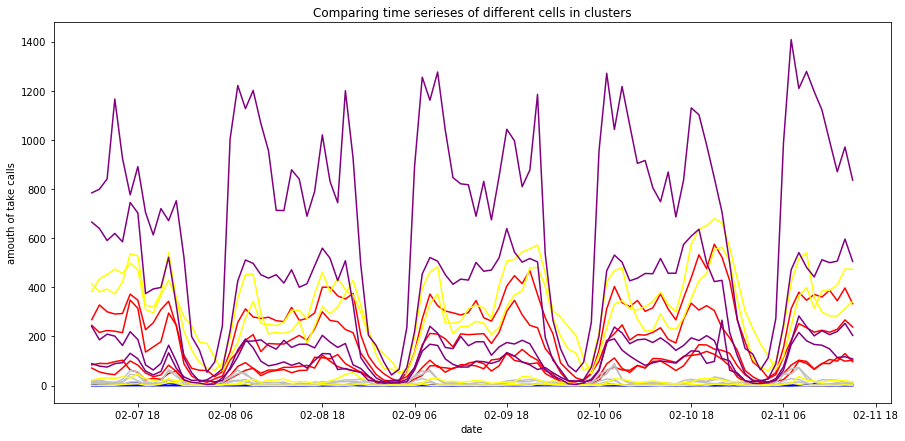

In [34]:
plt.figure(figsize(15,7))
plt.plot(data_cluster_0[data_cluster_0.columns[0]][900:1000], color='red', label='cluster 1')
plt.plot(data_cluster_0[data_cluster_0.columns[1]][900:1000], color='red')
plt.plot(data_cluster_0[data_cluster_0.columns[2]][900:1000], color='red')
plt.plot(data_cluster_0[data_cluster_0.columns[3]][900:1000], color='red')
plt.plot(data_cluster_1[data_cluster_1.columns[0]][900:1000], color='blue', label='cluster 2')
plt.plot(data_cluster_1[data_cluster_1.columns[1]][900:1000], color='blue')
plt.plot(data_cluster_1[data_cluster_1.columns[2]][900:1000], color='blue')
plt.plot(data_cluster_1[data_cluster_1.columns[3]][900:1000], color='blue')
plt.plot(data_cluster_2[data_cluster_2.columns[0]][900:1000], color='#C0C0C0', label='cluster 3')
plt.plot(data_cluster_2[data_cluster_2.columns[1]][900:1000], color='#C0C0C0')
plt.plot(data_cluster_2[data_cluster_2.columns[2]][900:1000], color='#C0C0C0')
plt.plot(data_cluster_2[data_cluster_2.columns[3]][900:1000], color='#C0C0C0')
plt.plot(data_cluster_3[data_cluster_3.columns[0]][900:1000], color='yellow', label='cluster 4')
plt.plot(data_cluster_3[data_cluster_3.columns[1]][900:1000], color='yellow')
plt.plot(data_cluster_3[data_cluster_3.columns[2]][900:1000], color='yellow')
plt.plot(data_cluster_3[data_cluster_3.columns[3]][900:1000], color='yellow')
plt.plot(data_cluster_4[data_cluster_4.columns[0]][900:1000], color='purple', label='cluster 5')
plt.plot(data_cluster_4[data_cluster_4.columns[1]][900:1000], color='purple')
plt.plot(data_cluster_4[data_cluster_4.columns[2]][900:1000], color='purple')
plt.plot(data_cluster_4[data_cluster_4.columns[3]][900:1000], color='purple')
plt.xlabel('date')
plt.ylabel('amouth of take calls')
plt.title('Comparing time serieses of different cells in clusters')

plt.show()

### to make it a bit more clear, let's look at graph of mean values of time serieses and its std

In [35]:
data_cluster_0['value_mean'], data_cluster_0['value_std'] =  [np.mean(i[1]) for i in data_cluster_0.iterrows()], [np.std(i[1]) for i in data_cluster_0.iterrows()]
data_cluster_1['value_mean'], data_cluster_1['value_std'] =  [np.mean(i[1]) for i in data_cluster_1.iterrows()], [np.std(i[1]) for i in data_cluster_1.iterrows()]
data_cluster_2['value_mean'], data_cluster_2['value_std'] =  [np.mean(i[1]) for i in data_cluster_2.iterrows()], [np.std(i[1]) for i in data_cluster_2.iterrows()]
data_cluster_3['value_mean'], data_cluster_3['value_std'] =  [np.mean(i[1]) for i in data_cluster_3.iterrows()], [np.std(i[1]) for i in data_cluster_3.iterrows()]
data_cluster_4['value_mean'], data_cluster_4['value_std'] =  [np.mean(i[1]) for i in data_cluster_4.iterrows()], [np.std(i[1]) for i in data_cluster_4.iterrows()]

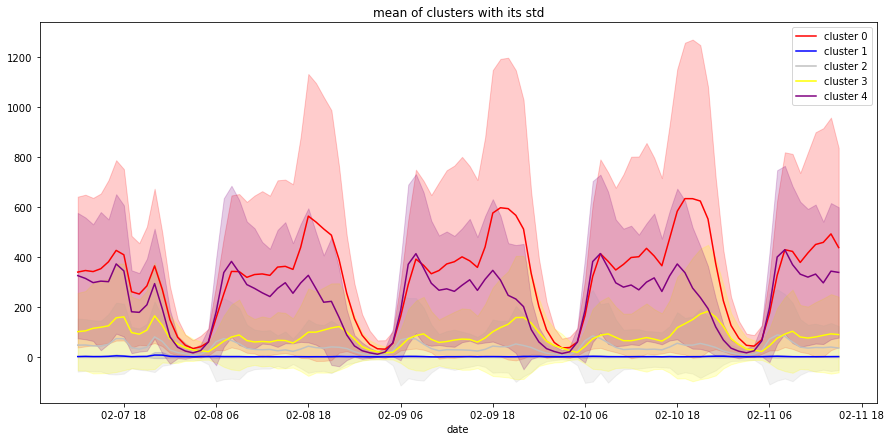

In [36]:
plt.figure(figsize(15,7))
plt.plot(data_cluster_0.value_mean[900:1000], color='red', label='cluster 0')
plt.fill_between(list(data_cluster_0.index)[900:1000],
                 data_cluster_0.value_mean[900:1000] - data_cluster_0.value_std[900:1000],
                 data_cluster_0.value_mean[900:1000] + data_cluster_0.value_std[900:1000],
                 alpha=0.2, color='red')
plt.plot(data_cluster_1.value_mean[900:1000], color='blue', label='cluster 1')
plt.fill_between(list(data_cluster_1.index)[900:1000],
                 data_cluster_1.value_mean[900:1000] - data_cluster_1.value_std[900:1000],
                 data_cluster_1.value_mean[900:1000] + data_cluster_1.value_std[900:1000],
                 alpha=0.2, color='blue')
plt.plot(data_cluster_2.value_mean[900:1000], color='#C0C0C0', label='cluster 2')
plt.fill_between(list(data_cluster_2.index)[900:1000],
                 data_cluster_2.value_mean[900:1000] - data_cluster_2.value_std[900:1000],
                 data_cluster_2.value_mean[900:1000] + data_cluster_2.value_std[900:1000],
                 alpha=0.2, color='#C0C0C0')
plt.plot(data_cluster_3.value_mean[900:1000], color='yellow', label='cluster 3')
plt.fill_between(list(data_cluster_3.index)[900:1000],
                 data_cluster_3.value_mean[900:1000] - data_cluster_3.value_std[900:1000],
                 data_cluster_3.value_mean[900:1000] + data_cluster_3.value_std[900:1000],
                 alpha=0.2, color='yellow')
plt.plot(data_cluster_4.value_mean[900:1000], color='purple', label='cluster 4')
plt.fill_between(list(data_cluster_4.index)[900:1000],
                 data_cluster_4.value_mean[900:1000] - data_cluster_4.value_std[900:1000],
                 data_cluster_4.value_mean[900:1000] + data_cluster_4.value_std[900:1000],
                 alpha=0.2, color='purple')
plt.legend()
plt.xlabel('date')
plt.title('mean of clusters with its std')
plt.show()

Curves' intervals intersect. But generally, they've got a different structure, so we may consider that clustering had been done fine

## Mean and std of time series for every cluster

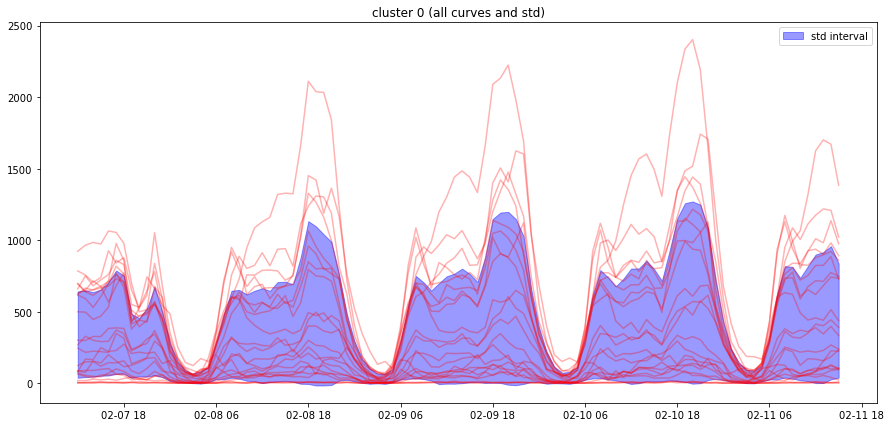

In [37]:
plt.fill_between(list(data_cluster_0.index)[900:1000],
                 data_cluster_0.value_mean[900:1000] - data_cluster_0.value_std[900:1000],
                 data_cluster_0.value_mean[900:1000] + data_cluster_0.value_std[900:1000],
                 alpha=0.4, color='blue', label='std interval')
for i in data_cluster_0.drop(['value_std', 'value_mean'], axis=1).columns:
    plt.plot(list(data_cluster_0.index)[900:1000], data_cluster_0[i].values[900:1000], color='red', alpha=0.3)
plt.title('cluster 0 (all curves and std)')
plt.legend()

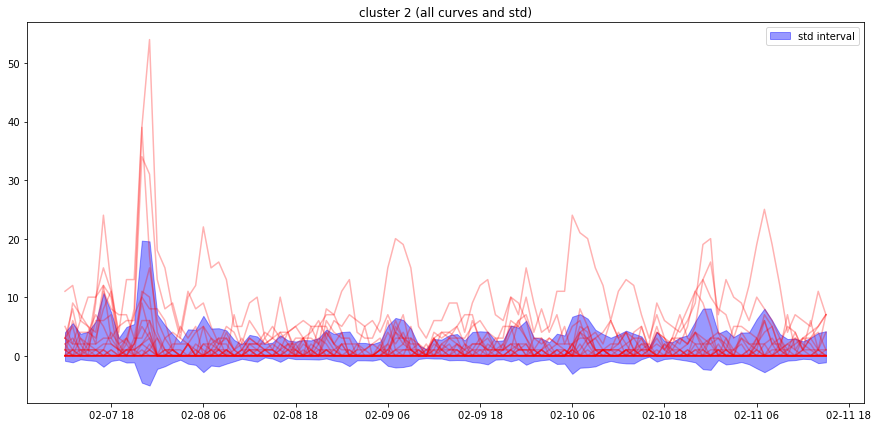

In [38]:
plt.fill_between(list(data_cluster_1.index)[900:1000],
                 data_cluster_1.value_mean[900:1000] - data_cluster_1.value_std[900:1000],
                 data_cluster_1.value_mean[900:1000] + data_cluster_1.value_std[900:1000],
                 alpha=0.4, color='blue', label='std interval')
for i in data_cluster_1.drop(['value_std', 'value_mean'], axis=1).columns:
    plt.plot(list(data_cluster_1.index)[900:1000], data_cluster_1[i].values[900:1000], color='red', alpha=0.3)
plt.title('cluster 2 (all curves and std)')
plt.legend()

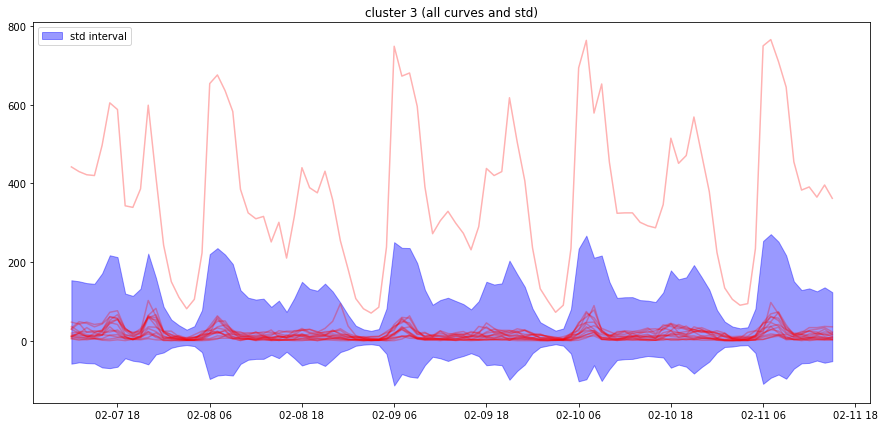

In [39]:
plt.fill_between(list(data_cluster_2.index)[900:1000],
                 data_cluster_2.value_mean[900:1000] - data_cluster_2.value_std[900:1000],
                 data_cluster_2.value_mean[900:1000] + data_cluster_2.value_std[900:1000],
                 alpha=0.4, color='blue', label='std interval')
for i in data_cluster_2.drop(['value_std', 'value_mean'], axis=1).columns:
    plt.plot(list(data_cluster_2.index)[900:1000], data_cluster_2[i].values[900:1000], color='red', alpha=0.3)
plt.title('cluster 3 (all curves and std)')
plt.legend()

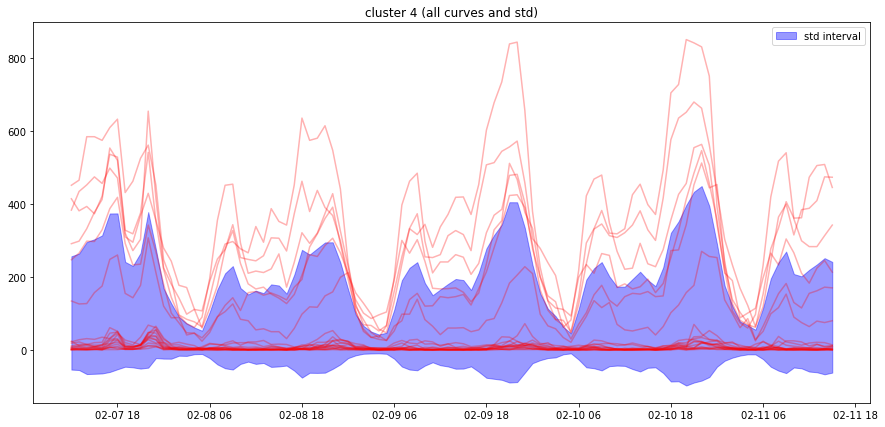

In [40]:
plt.fill_between(list(data_cluster_3.index)[900:1000],
                 data_cluster_3.value_mean[900:1000] - data_cluster_3.value_std[900:1000],
                 data_cluster_3.value_mean[900:1000] + data_cluster_3.value_std[900:1000],
                 alpha=0.4, color='blue', label='std interval')
for i in data_cluster_3.drop(['value_std', 'value_mean'], axis=1).columns:
    plt.plot(list(data_cluster_3.index)[900:1000], data_cluster_3[i].values[900:1000], color='red', alpha=0.3)
plt.title('cluster 4 (all curves and std)')
plt.legend()

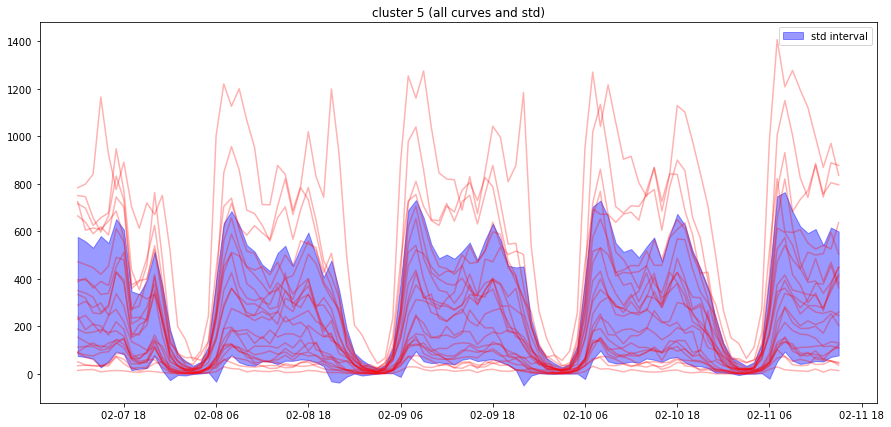

In [41]:
plt.fill_between(list(data_cluster_4.index)[900:1000],
                 data_cluster_4.value_mean[900:1000] - data_cluster_4.value_std[900:1000],
                 data_cluster_4.value_mean[900:1000] + data_cluster_4.value_std[900:1000],
                 alpha=0.4, color='blue', label='std interval')
for i in data_cluster_4.drop(['value_std', 'value_mean'], axis=1).columns:
    plt.plot(list(data_cluster_4.index)[900:1000], data_cluster_4[i].values[900:1000], color='red', alpha=0.3)
plt.title('cluster 5 (all curves and std)')
plt.legend()

Mean values can describe almost all the paramers of time series in a cluster. We can use a mean time series to fit to tune the paramers for all the clusters 

In [42]:
# save results
data_cluster_0.to_csv('cluster_0.csv', index=True)
data_cluster_1.to_csv('cluster_1.csv', index=True)
data_cluster_2.to_csv('cluster_2.csv', index=True)
data_cluster_3.to_csv('cluster_3.csv', index=True)
data_cluster_4.to_csv('cluster_4.csv', index=True)